
# Assignment - Univariate Gender Classification

## 1. An univariate classifier from first principles

### a. Data Generation
- Generate distributions (gaussian to start with) for male and female heights (1000 samples each) 
- Fix the mean of female heights to 152 cm and male mean height to 166 cm
- Label the appropriate gender for samples in each of the distribution (M or F)

### b. Standard Deviation
- Fix the sd of both the distributions to 5

### c. Classification Approaches
Implement the following approaches with aim to minimize misclassification:

i. **Likelihood-based Classification**
   - Assign gender based on likelihood calculated from distributions
   - Empirically estimate mean and sd
   - Calculate probability assuming gaussian distributions

ii. **Threshold-based Classification**
   - Derive a threshold height to separate male female

iii. **Quantized Classification**
   - Quantize the data at scale of 0.5 cm
   - Empirically estimate the likelihood of male female in each segment based on majority

iv. **Evaluation**
   - Output a confusion matrix for classification in each of the above cases

### d. Standard Deviation Analysis
- Try following values of sd: 2.5, 7.5 and 10
- Repeat steps 3.a, 3.b, 3.c, 3.d
- Observe impact of change in sd on classification accuracy

### e. Quantization Interval Analysis
- Change the quantization interval length (0.001, 0.05, 0.1, 0.3, 1, 2, 5, 10 cm etc)
- Repeat steps 3.a, 3.b, 3.c, 3.d
- Observe impact of change in sd on classification accuracy

Name : Harshavardhan Anil Bamane
PRN : 22510112
Batch : T6

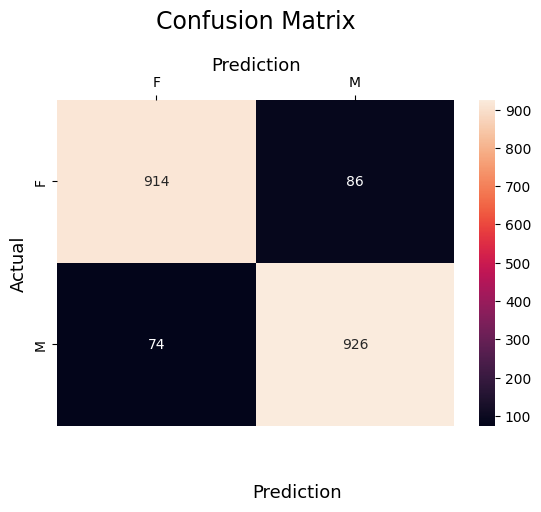

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns


def generate_Heights(n=1000, femalex=152, malex=166, sd=5):
    female_h = np.random.normal(femalex,sd,n)
    male_h = np.random.normal(malex,sd,n)
    df_fm = pd.DataFrame({'height': female_h, 'gender': ['F'] * n})
    df_m = pd.DataFrame({'height': male_h, 'gender': ['M'] * n})
    df = pd.concat([df_fm,df_m])
    return df

# print(generate_Heights())
df = generate_Heights()
generate_Heights().to_csv('heights.csv', index=False)

def threshold_classifier(df, threshold=None):
    if threshold is None:
        threshold = (152 + 166) / 2
    result = np.where(df['height'] > threshold, 'M', 'F')
    return result

# print(threshold_classifier(df))
result = threshold_classifier(df)
df['predicted_gender'] = result
df.to_csv('threshold.csv', index=False)

actual = df['gender']
predicted = df['predicted_gender']
cm = confusion_matrix(actual, predicted, labels=['F', 'M'])
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['F','M'],
            yticklabels=['F','M'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()


In [8]:
def quantized_classifier(df, interval=0.5):
    df['height_quantized'] = (df['height'] // interval) * interval
    majority_gender = df.groupby('height_quantized')['gender'].agg(
        lambda x: 'M' if (x == 'M').sum() > (x == 'F').sum() else 'F'
    )
    predictions = df['height_quantized'].map(majority_gender)
    return predictions

In [9]:
result = quantized_classifier(df)

df['predicted_gender'] = result
df.to_csv('quantized.csv',index = False)

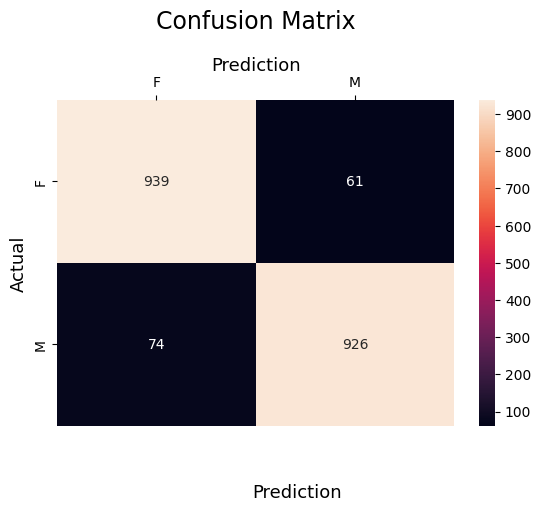

In [10]:
actual = df['gender']
predicted = df['predicted_gender']
cm = confusion_matrix(actual, predicted, labels=['F', 'M'])
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['F','M'],
            yticklabels=['F','M'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

In [23]:
def probability_based_on_likelihood(df,femalex = 152 , malex = 166 , sd = 5):
    female_prob = norm.pdf(df['height'], femalex, sd)
    male_prob = norm.pdf(df['height'], malex, sd)
    result = np.where(male_prob>female_prob, 'M', 'F')
    return result

result = probability_based_on_likelihood(df)
print(result)
df['predicted_gender'] = result

df.to_csv('pdf.csv', index=False)

['F' 'F' 'F' ... 'M' 'M' 'M']


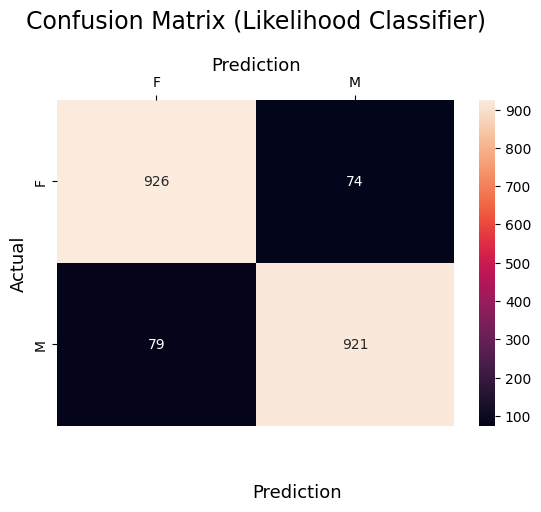

In [26]:
actual = df['gender']
predicted = df['predicted_gender']
cm = confusion_matrix(actual, predicted, labels=['F', 'M'])
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['F','M'],
            yticklabels=['F','M'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix (Likelihood Classifier)', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()